In [1]:
import os
import sys
import json
import math
import torch
import numpy as np

import matplotlib
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    # 'font.family': 'serif',
    'font.size':12,
})
from matplotlib import pyplot as plt

from torch import nn
import pytorch_lightning as pl
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers import TensorBoardLogger
seed_everything(42)

import DiffNet
from DiffNet.networks.wgan import GoodNetwork
from DiffNet.DiffNetFEM import DiffNet2DFEM
from e1_stokes_mms_resmin import LDC, Stokes

/work/baskarg/bkhara/python_virtual_envs/lightning/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Global seed set to 42
Global seed set to 42


In [21]:
def plot_contours2(k,f,u,u_exact):
    diff = u - u_exact
    # plotting        
    fig, axs = plt.subplots(1, 5, figsize=(3*5,2),
                        subplot_kw={'aspect': 'auto'}, sharex=True, sharey=True, squeeze=True)
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])              

    # print(np.linalg.norm(diff.flatten())/self.domain_size)
    im = axs[0].imshow(f,cmap='jet')
    # fig.colorbar(im, ax=axs[0], ticks=[0.0, 4.0, 8.0, 12.0, 16.0, 20.0]); axs[0].set_title(r'$f$')
    fig.colorbar(im, ax=axs[0]); axs[0].set_title(r'$f$')
    im = axs[1].imshow(k,cmap='jet')
    fig.colorbar(im, ax=axs[1]); axs[1].set_title(r'$\nu$')
    im = axs[2].imshow(u,cmap='jet')
    fig.colorbar(im, ax=axs[2]); axs[2].set_title(r'$u_{\theta}$')
    im = axs[3].imshow(u_exact,cmap='jet')
    fig.colorbar(im, ax=axs[3]); axs[3].set_title(r'$u_{exact}$')
    im = axs[4].imshow(diff,cmap='jet')
    fig.colorbar(im, ax=axs[4]); axs[4].set_title(r'$u_{\theta}-u_{exact}$')
    plt.show()
    # plt.savefig(os.path.join(self.logger[0].log_dir, 'contour_' + str(self.current_epoch) + '.png'))
    # self.logger[0].experiment.add_figure('Contour Plots', fig, self.current_epoch)
    # plt.close('all')
    
def plot_contours(u, v, p, u_exact, v_exact, p_exact):
    fig, axs = plt.subplots(3, 3, figsize=(8*3,6*3),
                        subplot_kw={'aspect': 'auto'}, squeeze=True)

    for ax_row in axs:
        for ax in ax_row:
            ax.set_xticks([])
            ax.set_yticks([]) 

    div = u_x + v_y

    im0 = axs[0,0].imshow(u,cmap='jet', origin='lower')
    fig.colorbar(im0, ax=axs[0,0])
    im1 = axs[0,1].imshow(v,cmap='jet',origin='lower')
    fig.colorbar(im1, ax=axs[0,1])  
    im2 = axs[0,2].imshow(p,cmap='jet',origin='lower')
    fig.colorbar(im2, ax=axs[0,2])
    x = np.linspace(0, 1, u.shape[0])
    y = np.linspace(0, 1, u.shape[1])

    im = axs[1,0].imshow(u-u_exact,cmap='jet', origin='lower')
    fig.colorbar(im, ax=axs[1,0])
    im = axs[1,1].imshow(v-v_exact,cmap='jet',origin='lower')
    fig.colorbar(im, ax=axs[1,1])  
    im = axs[1,2].imshow(p-p_exact,cmap='jet',origin='lower')
    fig.colorbar(im, ax=axs[1,2])
    
    im3 = axs[2,0].imshow(div,cmap='jet',origin='lower')
    fig.colorbar(im3, ax=axs[2,0])  
    im4 = axs[2,1].imshow((u**2 + v**2)**0.5,cmap='jet',origin='lower')
    fig.colorbar(im4, ax=axs[2,1])

    xx , yy = np.meshgrid(x, y)
    im5 = axs[2,2].streamplot(xx, yy, u, v, color='k', cmap='jet')

Missing logger folder: ./stokes_mms


(1, 3, 16, 16)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/work/baskarg/bkhara/python_virtual_envs/lightning/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Experiment logs directory ./stokes_mms/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
  warnings.warn(*args, **kwargs)

  | Name      | Type          | Params
--------------------------------------------
0 | network   | ParameterList | 768   
1 | N_gp      | ParameterList | 16    
2 | dN_x_gp   | ParameterList | 16    
3 | dN_y_gp   | ParameterList | 16    
4 | d2N_x_gp  | ParameterList | 16    
5 | d2N_y_gp  | ParameterList | 16    
6 | d2N_xy_gp | ParameterList | 16    
--------------------------------------------
768       Trainable params
96        Non-trainable params
864       Total params
0.003     Total estimated model params size (MB)


Epoch 0:  16%|█▌        | 16/100 [00:00<00:00, 85.94it/s, loss=11.4, v_num=0_0]

/work/baskarg/bkhara/python_virtual_envs/lightning/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Epoch 401: 100%|██████████| 100/100 [00:01<00:00, 57.41it/s, loss=7.75, v_num=0_0]

/work/baskarg/bkhara/python_virtual_envs/lightning/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


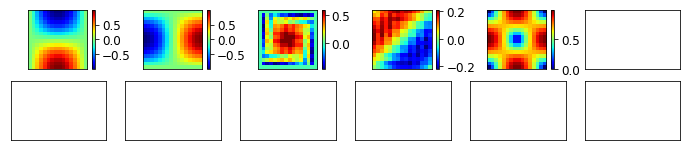

In [3]:
domain_size = 16
dir_string = "stokes_mms"
max_epochs = 1000

x = np.linspace(0, 1, domain_size)
y = np.linspace(0, 1, domain_size)
xx , yy = np.meshgrid(x, y)

dataset = LDC(domain_size=domain_size)
v1 = np.zeros_like(dataset.x) # np.sin(math.pi*xx)*np.cos(math.pi*yy)
v2 = np.zeros_like(dataset.x) # -np.cos(math.pi*xx)*np.sin(math.pi*yy)
p  = np.zeros_like(dataset.x) # np.sin(math.pi*xx)*np.sin(math.pi*yy)
u_tensor = np.expand_dims(np.array([v1,v2,p]),0)
print(u_tensor.shape)
network = torch.nn.ParameterList([torch.nn.Parameter(torch.FloatTensor(u_tensor), requires_grad=True)])
basecase = Stokes(network, dataset, domain_size=domain_size, batch_size=1, fem_basis_deg=1)

# Initialize trainer
logger = pl.loggers.TensorBoardLogger('.', name=dir_string)
csv_logger = pl.loggers.CSVLogger(logger.save_dir, name=logger.name, version=logger.version)

early_stopping = pl.callbacks.early_stopping.EarlyStopping('loss',
    min_delta=1e-8, patience=10, verbose=False, mode='max', strict=True)
checkpoint = pl.callbacks.model_checkpoint.ModelCheckpoint(monitor='loss',
    dirpath=logger.log_dir, filename='{epoch}-{step}',
    mode='min', save_last=True)

trainer = Trainer(gpus=[0],callbacks=[early_stopping],
    checkpoint_callback=checkpoint, logger=[logger,csv_logger],
    max_epochs=max_epochs, deterministic=True, profiler="simple")

# Training
trainer.fit(basecase)
# Save network
torch.save(basecase.network, os.path.join(logger.log_dir, 'network.pt'))

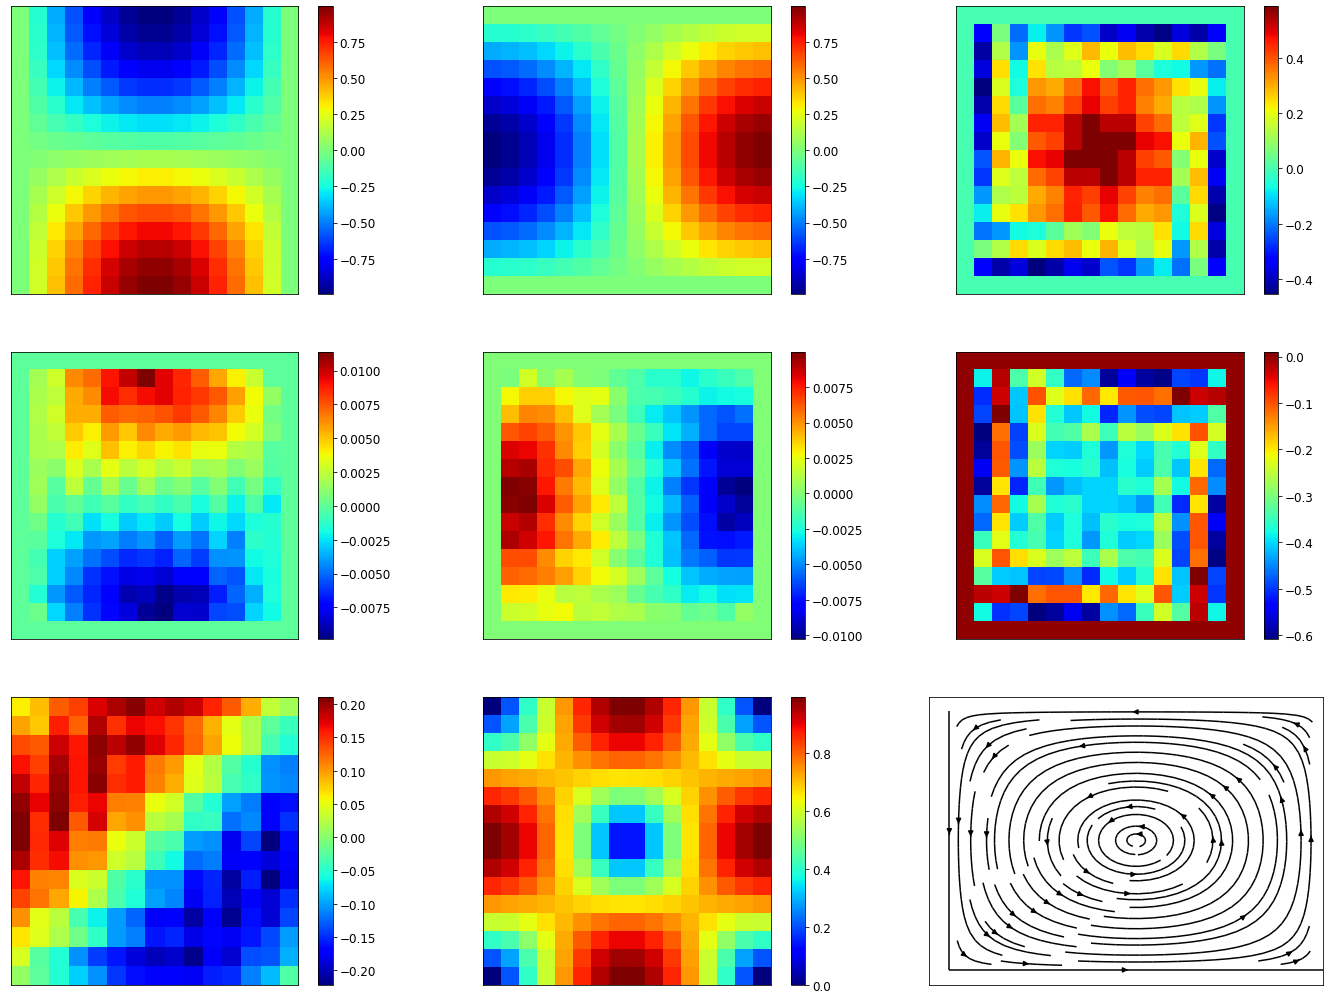

In [22]:
# Query
basecase.dataset[0]
inputs, forcing = basecase.dataset[0]
u, v, p, u_x, v_y = basecase.do_query(inputs, forcing)
u_exact = basecase.u_exact.squeeze()
v_exact = basecase.v_exact.squeeze()
p_exact = basecase.p_exact.squeeze()
# L2 error calculation
# basecase.calc_l2_err()
# plot
plot_contours(u,v,p,u_exact,v_exact,p_exact)

nsample =  100


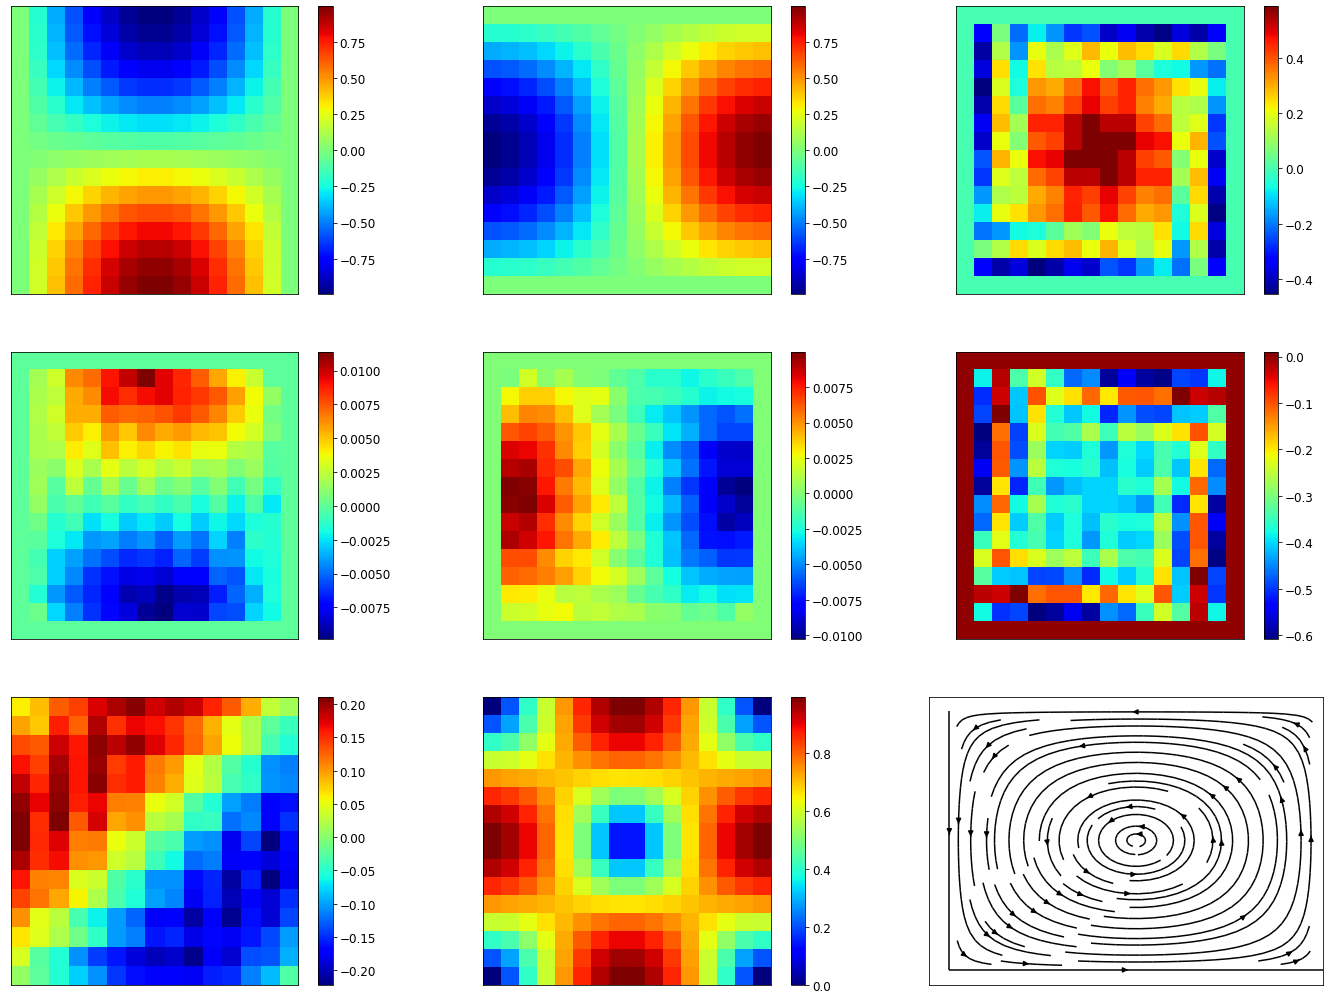

In [23]:
# separate query
version_id = 0
case_dir = './stokes_mms/version_'+str(version_id)
dataset = LDC(domain_size=domain_size)
network = torch.load(os.path.join(case_dir, 'network.pt'))
equation = Stokes(network, dataset, domain_size=domain_size, batch_size=1, fem_basis_deg=1)
# Query
inputs, forcing = basecase.dataset[0]
u, v, p, u_x, v_y = basecase.do_query(inputs, forcing)
u_exact = basecase.u_exact.squeeze()
v_exact = basecase.v_exact.squeeze()
p_exact = basecase.p_exact.squeeze()

# plot
plot_contours(u,v,p,u_exact,v_exact,p_exact)

nsample = len(basecase.dataset)
print("nsample = ", nsample)